In [343]:
col = 'crim	zn	indus	chas	nox	rm	age	dis	rad	tax	ptratio	b	lstat	medv'.split()
len(col)

14

#### price 예측
- 데이터셋 : hosing.csv
- 학습종류 : 지도학습 / 회귀Regression - 값을 예측
- 알고리즘 : 분석 후 결정
- 피쳐 : 나머지 모두
- 타겟: medv



In [344]:
## 1-1
import pandas as pd
# 데이터 분석 및 전처리
import numpy as np
# 숫자처리
import matplotlib.pyplot as plt
# 데이터 시각화

from sklearn.linear_model import LinearRegression
                            ## ML 알고리즘
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
                            ## 성능평가 모듈
from sklearn.model_selection import train_test_split
                            ## 데이터셋 분리 관련 모듈
                            ## 학습/검증/테스트 

In [345]:
houseDict = {x:[] for x in col}

In [346]:
houseDF = pd.DataFrame(pd.read_csv('../data/housing.csv', header=None))
for i in houseDF.index:
    for j in range(14):
        houseDict[col[j]].append(houseDF.iloc[i,:][0].split()[j])
    
# houseDF.iloc[1,:]

In [347]:
houDF = pd.DataFrame(houseDict)
houDF = houDF.astype(float)
houDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [348]:
houDF.shape

(506, 14)

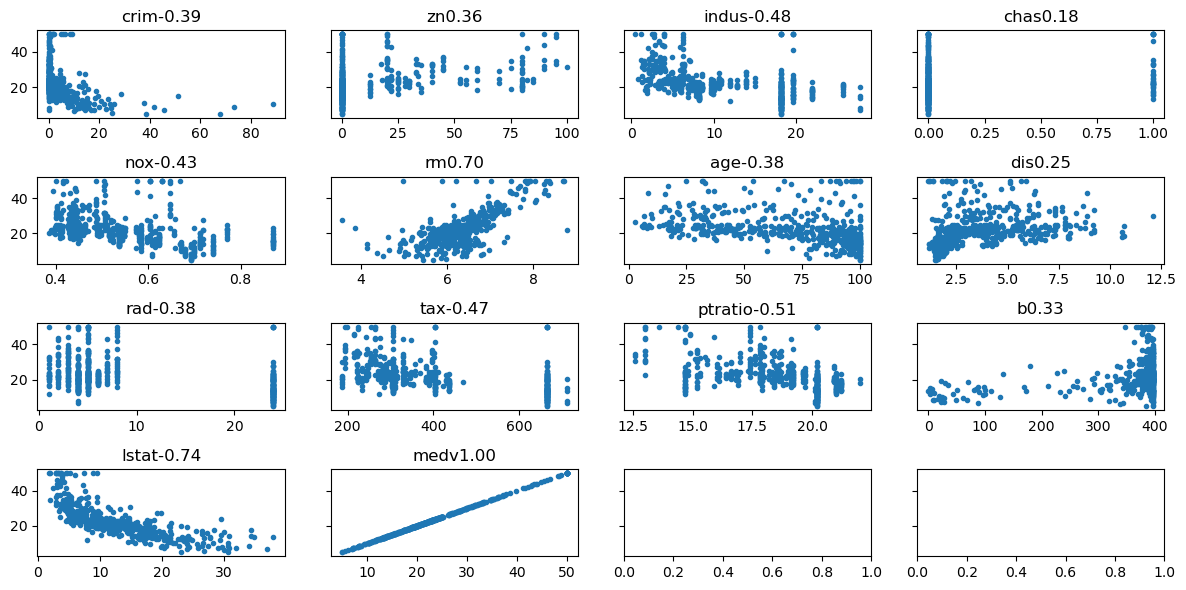

In [349]:
fig, ax = plt.subplots(4,4, sharey=True,figsize = (12,6))
ax = ax.flatten()
# print(ax[0])
for i in range(0,14):
    ax[i].plot(houDF.iloc[:,i],houDF['medv'], '.')
    ax[i].set_title(houDF.columns[i]+ str(f"{houDF.iloc[:,i].corr(houDF['medv']):.2f}"))

plt.tight_layout()
plt.show()    


medv 연관성 있는 데이터.
- rm, istat

In [350]:
feature = houDF[['rm','lstat']]
target = houDF['medv']

[3] 데이터셋 준비
- 피처와 타겟 분리
- 학습용/검증용/테스트용 데이터셋 분리 => 학습용과 테스트용으로만 분리

In [351]:
## 3-1 피처와 타겟 분리
featureDF = feature
targetSR = target
print(f"featureDF => {featureDF.ndim}D, targetSr => {targetSR.ndim}D")

featureDF => 2D, targetSr => 1D


In [352]:
## 3-2 데이터셋 분리 => 학습용 : 테스트용 75:25 (default ratio)
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size =0.25,
                                                    random_state=5)
print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape} / y_test => {X_test.ndim}D, {y_test.shape}")

X_train => 2D (379, 2) / X_test => 2D, (127, 2)
y_train => 1D (379,) / y_test => 2D, (127,)


In [353]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [354]:
## 학습 후 모델에 적용되는 a,b: 모델 파라미터
print(f"lr.coef_ {lr.coef_}")
print(f"lr.intercept_ {lr.intercept_}")
print(f"X_train = {lr.coef_[0]}*y_train + {lr.intercept_}")

lr.coef_ [ 4.90698873 -0.67707065]
lr.intercept_ 0.2630632134656672
X_train = 4.906988731700793*y_train + 0.2630632134656672


[4] 성능 평가 <hr>
- 모델 성능 평가
- 손실 계산

In [355]:

pre_y = lr.predict(X_train)
score = lr.score(X_train, pre_y)
rmse = root_mean_squared_error(y_train, pre_y)

print(f"X_train score {score}, rmse {rmse}")

X_train score 1.0, rmse 5.518974438713577


In [356]:

pre_y = lr.predict(X_test)
score = lr.score(X_test, pre_y)
rmse = root_mean_squared_error(y_test, pre_y)

print(f"X_test score {score}, rmse {rmse}")

X_test score 1.0, rmse 5.552090760557373


In [357]:
## 테스트에서의 rmse가 높다 = 과대적합

[5] 예측 서비스 <hr>
- 웹 또는 앱에 포함된 모델에서 예측 서비스 진행
- 예측 메서드 : 알고리즘객체변수명.predict(2D_data) ==> 1D 예측갑 반환
    ** 전제조건  >>> 학습 시 진행된 데이터 전처리괒어을 거친 2D_data 를 전달해야함

In [358]:
## - 모델이 결정한 선형식기반 결과 예측
pre_medv = lr.predict(feature)

# # 모델 예측값과 정답의 차이계산
# mse = mean_squared_error(feature, pre_mpg)
# #오차평균

# mae = mean_absolute_error(feature,pre_mpg)

In [359]:
feature

,rm,lstat
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33
...,...,...
501,6.593,9.67
502,6.120,9.08
503,6.976,5.64
504,6.794,6.48


In [360]:
new_data = [[6, 10]]

pre_medv = lr.predict(new_data)

print(f" 예상 medv 는 {pre_medv}입니다 ")

 예상 medv 는 [22.93428907]입니다 


c:\Users\kdt\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [361]:
#과대적합의심되므로 컬럼조정
# rm과 lstat의 정규화ㅣ
nhowDF = houDF.copy()

In [369]:
for i in nhowDF.index:
    if nhowDF.loc[i,'rm'] > 1.3*(sum(nhowDF['rm'])/len(nhowDF['rm'])):
        nhowDF.loc[i,'rm'] = 1.3*(sum(nhowDF['rm'])/len(nhowDF['rm']))
    elif nhowDF.loc[i,'rm'] < 0.7*(sum(nhowDF['rm'])/len(nhowDF['rm'])): 
        nhowDF.loc[i,'rm'] = 0.7*(sum(nhowDF['rm'])/len(nhowDF['rm']))


In [370]:
for i in nhowDF.index:
    if nhowDF.loc[i,'lstat'] > 1.5*(sum(nhowDF['lstat'])/len(nhowDF['lstat'])):
        nhowDF.loc[i,'lstat'] = 1.5*(sum(nhowDF['lstat'])/len(nhowDF['lstat']))
    elif nhowDF.loc[i,'lstat'] < 0.5*(sum(nhowDF['lstat'])/len(nhowDF['lstat'])):
        nhowDF.loc[i,'lstat'] = 0.5*(sum(nhowDF['lstat'])/len(nhowDF['lstat']))


In [371]:
# for i in nhowDF.index:
#     if nhowDF.loc[i,'medv'] > 1.5*(sum(nhowDF['medv'])/len(nhowDF['medv'])):
#         nhowDF.loc[i,'medv'] = 1.5*(sum(nhowDF['medv'])/len(nhowDF['medv']))
#     elif nhowDF.loc[i,'medv'] < 0.5*(sum(nhowDF['medv'])/len(nhowDF['medv'])):
#         nhowDF.loc[i,'medv'] = 0.5*(sum(nhowDF['medv'])/len(nhowDF['medv']))


In [372]:
feature = nhowDF[['rm','lstat']]
target = nhowDF['medv']

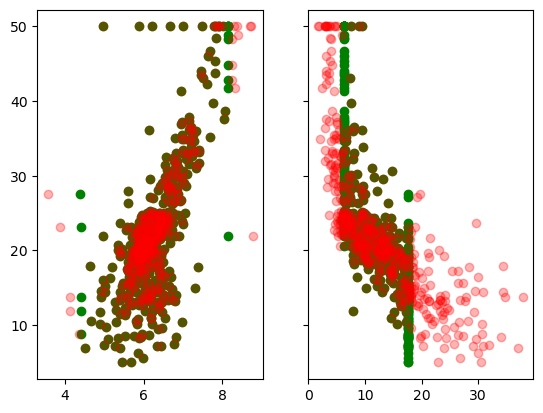

In [373]:
fig, ax = plt.subplots(1,2, sharey=True)
# ax = np.flatten(ax)
# ax2 = plt.twiny(ax)
ax[ 0].plot( nhowDF['rm'], nhowDF['medv'], 'og')
ax[ 0].plot( houDF['rm'], houDF['medv'], 'or', alpha=0.3)
# ax2[0].plot(nhowDF['medv'], houDF['rm'], 'or')
ax[1].plot(nhowDF['lstat'], nhowDF['medv'],  'og')
ax[1].plot( houDF['lstat'], houDF['medv'],'or', alpha=0.3)


[3] 데이터셋 준비
- 피처와 타겟 분리
- 학습용/검증용/테스트용 데이터셋 분리 => 학습용과 테스트용으로만 분리

In [374]:
## 3-1 피처와 타겟 분리
featureDF = feature
targetSR = target
print(f"featureDF => {featureDF.ndim}D, targetSr => {targetSR.ndim}D")

featureDF => 2D, targetSr => 1D


In [375]:
## 3-2 데이터셋 분리 => 학습용 : 테스트용 75:25 (default ratio)
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size =0.25,
                                                    random_state=5)
print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape} / y_test => {X_test.ndim}D, {y_test.shape}")

X_train => 2D (379, 2) / X_test => 2D, (127, 2)
y_train => 1D (379,) / y_test => 2D, (127,)


In [376]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [377]:
## 학습 후 모델에 적용되는 a,b: 모델 파라미터
print(f"lr.coef_ {lr.coef_}")
print(f"lr.intercept_ {lr.intercept_}")
print(f"X_train = {lr.coef_[0]}*y_train + {lr.intercept_}")

lr.coef_ [ 5.77358765 -1.0210303 ]
lr.intercept_ -1.7688545775237365
X_train = 5.773587645647066*y_train + -1.7688545775237365


[4] 성능 평가 <hr>
- 모델 성능 평가
- 손실 계산

In [378]:

pre_y = lr.predict(X_train)
score = lr.score(X_train, pre_y)
rmse = root_mean_squared_error(y_train, pre_y)

print(f"X_train score {score}, rmse {rmse}")

X_train score 1.0, rmse 5.4325784272353905


In [379]:

pre_y = lr.predict(X_test)
score = lr.score(X_test, pre_y)
rmse = root_mean_squared_error(y_test, pre_y)

print(f"X_test score {score}, rmse {rmse}")

X_test score 1.0, rmse 5.1485213242554595


In [380]:
## 정규화 후 소폭 감소
## 1.3 정규화보다 1.5정규화일떄 더 감소

[5] 예측 서비스 <hr>
- 웹 또는 앱에 포함된 모델에서 예측 서비스 진행
- 예측 메서드 : 알고리즘객체변수명.predict(2D_data) ==> 1D 예측갑 반환
    ** 전제조건  >>> 학습 시 진행된 데이터 전처리괒어을 거친 2D_data 를 전달해야함

In [381]:
## - 모델이 결정한 선형식기반 결과 예측
pre_medv = lr.predict(X_test)

# 모델 예측값과 정답의 차이계산
mse = mean_squared_error(y_test, pre_medv)
#오차평균

mae = mean_absolute_error(y_test,pre_medv)

print(mse, mae)

26.50727182631319 3.6465956553603114


In [382]:
feature.head()

,rm,lstat
0,6.575,6.326532
1,6.421,9.140000
2,7.185,6.327862
3,6.998,6.330133
4,7.147,6.333483


In [383]:
new_data = [[6, 10]]

pre_medv = lr.predict(new_data)

print(f" 예상 medv 는 {pre_medv}입니다 ")

 예상 medv 는 [22.66236829]입니다 


c:\Users\kdt\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
